In [1]:

# 500mo



# 460 dossier

# 90,468
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import os
import cv2
from skimage import io
import dlib
import imutils


output='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/output/'
dataset='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/1/self-built-masked-face-recognition-dataset/'


2022-02-20 07:40:53.194976: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-20 07:40:53.194997: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [21]:
classe = os.listdir(dataset)

# fig=plt.figure ( figsize = (11 , 3))
def affiche(source,im,im2):
  fig=plt.figure ( figsize = (11 , 3))
  # fig.suptitle ( f'{r}')
  ax1=fig.add_subplot (131)
  ax1.axis ('off')
  ax1.imshow (source)

  ax2=fig.add_subplot (132)
  ax2.axis ('off')
  ax2.imshow (im)

  ax3=fig.add_subplot (133)
  ax3.axis ('off')
  ax3.imshow (im2)



def affiche_2(source,im):
  fig=plt.figure ( figsize = (7 , 3))
  # fig.suptitle ( f'{r}')
  ax1=fig.add_subplot (121)
  ax1.axis ('off')
  ax1.imshow (source)

  ax2=fig.add_subplot (122)
  ax2.axis ('off')
  ax2.imshow (im)


In [15]:
classe

['aidai',
 'anhu',
 'axin',
 'baibaihe',
 'baijingting',
 'baike',
 'baobeier',
 'baojianfeng',
 'benxi',
 'caiguoqing',
 'caihancen',
 'caiyilin',
 'caizhuoyan',
 'caobingkun',
 'caoying',
 'caoyunjin',
 'cengyongti',
 'changshilei',
 'changyuan',
 'chenderong',
 'chendouling',
 'chenfarong',
 'chenglong',
 'chenguanxi',
 'chenhaomin',
 'chenhe',
 'chenhuilin',
 'chenhuixian',
 'chenjiaqi',
 'chenkun',
 'chenlong',
 'chenqiaoen',
 'chenshu',
 'chenweiting',
 'chenxiang',
 'chenxinyu',
 'chenxuedong',
 'chenyao',
 'chenyixun',
 'chenyufan',
 'chenzhipeng',
 'daipeini',
 'dazhangwei',
 'dengchao',
 'denglun',
 'dengziqi',
 'dilireba',
 'dingding',
 'ditianlin',
 'dongchengpeng',
 'dongjie',
 'dongxuan',
 'duhaitao',
 'dujiang',
 'duwenze',
 'fanbingbing',
 'fanganna',
 'fanshiqi',
 'fanwei',
 'fanyichen',
 'fengjianyu',
 'fuxinbo',
 'ganwei',
 'gaohu',
 'gaoyixiang',
 'gaoyuanyuan',
 'gongbeibi',
 'guanxiaotong',
 'guanyue',
 'gulinazha',
 'guobiting',
 'guofucheng',
 'guojingfei',
 'gu

In [16]:
pim='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/1/self-built-masked-face-recognition-dataset/AFDB_face_dataset/gutianle/0_0_gutianle_0017.jpg'

-18,24 -- 120,148
[(8, 32) (115, 140)]


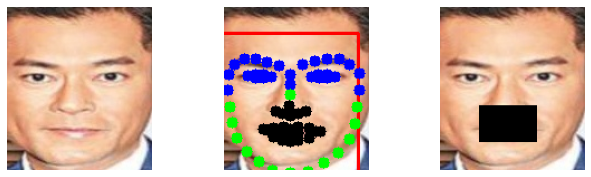

In [22]:
# ------------------------------- POUR PRESENTATION NON OPTI
from imutils import face_utils


# predictor= dlib.shape_predictor('/home/xeowhyx/projet/w10/dataset/face/shape_predictor_68_face_landmarks.dat')
predictor= dlib.shape_predictor('/home/xeowhyx/projet/w10/dataset/face/shape_predictor_68_face_landmarks_GTX.dat')

bouche=np.array(list(range(30,36))+list(range(48,68)))
yeux=np.array([0,1]+list(range(15,29))+list(range(36,48)))
detector = dlib.get_frontal_face_detector()

source=io.imread(pim)
# source=image_mask
image=source.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray=image


#########################
###################################  detecor sur grb
face_detector=dlib.get_frontal_face_detector()
# face_location=face_detector(im,1)

# coordonne des faces
dets = face_detector(image)

# si plusieurs face
for det in dets:
    cv2.rectangle( image, (det.left(), det.top()), (det.right(), det.bottom()) , (255,0,0), 2)
    print(f'{det.left()},{det.top()} -- {det.right()},{det.bottom()}')
###################################  detecor sur grb
#########################

dots_size = 5 
rects = detector(gray, 1)
# loop over the face detections

for (i, rect) in enumerate(rects):
    print(rect)
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array

    shape = predictor(gray, rect)

    shape = face_utils.shape_to_np(shape)
    
    # show the face number
    # cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
    #     cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    for mark,(x, y) in enumerate(shape):
        if mark in bouche:
            cv2.circle(image, (x, y), dots_size, (0, 0, 0), -1)
        elif mark in yeux:
            cv2.circle(image, (x, y), dots_size, (0, 0, 255), -1)
        else:
            cv2.circle(image, (x, y), dots_size, (0, 255, 0), -1)
        
    
    # for (x,y) in shape:
    #     cv2.circle(image, (x, y), dots_size, (0, 255, 0), -1)


#########################
###################################  creation masque

a=np.min(shape[bouche][:,0])
b=np.max(shape[bouche][:,0])
c=np.min(shape[bouche][:,1])
d=np.max(shape[bouche][:,1])
image_mask=source.copy()

cv2.rectangle( image_mask, (a, c), (b, d) , (0,0,0), -1)
# plt.imshow(image)
# affiche(source, im, im2)
affiche(source, image, image_mask)

In [130]:
# ------------------------------- POUR PRESENTATION NON OPTI
from imutils import face_utils


# predictor= dlib.shape_predictor('/home/xeowhyx/projet/w10/dataset/face/shape_predictor_68_face_landmarks.dat')
predictor= dlib.shape_predictor('/home/xeowhyx/projet/w10/dataset/face/shape_predictor_68_face_landmarks_GTX.dat')



def create_mask(pim):
    bouche=np.array(list(range(30,36))+list(range(48,68)))
    # yeux=np.array([0,1]+list(range(15,29))+list(range(36,48)))
    detector = dlib.get_frontal_face_detector()
    source=io.imread(pim)
    
    gray = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)


    i=-1
    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)[bouche]
    
    if i==-1:return -1

    #########################
    ###################################  creation masque

    a=np.min(shape[:,0])
    b=np.max(shape[:,0])
    c=np.min(shape[:,1])
    d=np.max(shape[:,1])
    

    cv2.rectangle( source, (a, c), (b, d) , (0,0,0), -1)

    # return (cv2.cvtColor(source, cv2.COLOR_RGB2BGR))
    return source

    # affiche_2(source,image_mask)

In [162]:
import shutil
import scipy.misc
import matplotlib


classe_nature=os.listdir(dataset+'AFDB_masked_face_dataset/')
k=-1
for cl in classe:
    k+=1
    
    # creation path
    if os.path.exists(output+cl): shutil.rmtree(output+cl)
    os.mkdir(output+cl)

    
    # parcour source
    num=0
    for im in os.listdir(dataset+'AFDB_face_dataset/'+cl):
        num+=1

        name=num_to_name(num)
        # add nature
        shutil.copy(dataset+'AFDB_face_dataset/'+cl+'/'+im, output+cl+'/'+name+'.jpg')
        
        im_mask=create_mask(dataset+'AFDB_face_dataset/'+cl+'/'+im)

        # if im_mask==-1:
        if isinstance(im_mask, int):
            num-=1
            # print('skip')
            continue

        # add synthetic
        cv2.imwrite(output+cl+'/'+name+'_mask.jpg', cv2.cvtColor(im_mask, cv2.COLOR_RGB2BGR))
        


    # parcour mask nature
    # classe_nature=os.listdir(dataset+'AFDB_face_dataset/'+cl)
    if cl in classe_nature:
        num=0
        for im in os.listdir(dataset+'AFDB_masked_face_dataset/'+cl):
            num+=1
            name=num_to_name(num)
            shutil.copy(dataset+'AFDB_masked_face_dataset/'+cl+'/'+im, output+cl+'/nature_'+name+'.jpg')
    

In [3]:
import tensorflow as tf
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping: no known devices.


2022-02-20 07:16:17.953146: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-20 07:16:17.953743: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-20 07:16:17.953759: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-20 07:16:17.953775: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kiwi): /proc/driver/nvidia/version does not exist


In [149]:
classe_nature=os.listdir(dataset+'AFDB_masked_face_dataset/')
# print(classe_nature)

print(len(list(set(classe_nature) & set(classe))))

inter=list(set(classe_nature) & set(classe))
# print(inter)
# len(classe_nature)

442


In [86]:
def num_to_name(num):
    # res=int(num)+1
    n=len(str(num))
    desire=3
    final='0'*(desire-n)+str(num)
    return final
    

In [154]:
a=['a','b','c']
b=['233','ee']

if 'ee' in b:
    print('ok')

ok


In [97]:
res=np.array(list(range(1,5)))

In [103]:
if (res.all()==-1):
    print('oui')

In [109]:
isinstance(-1, int)

True

In [ ]:

my_list = os.listdir('My_directory')